<h1>Machine Learning for Time Series: Overview & Classification</h1>
<h4>Session 3</h4>
<br>
1 Data Cleaning and Preparation (Feature extraction, ...)<br>
2 Classification with Time Series Data<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

<h2>Occupancy Detection from Temperature, Humidity, Light and CO2 Measurements</h2>

<h3> Read in data </h3>

In [2]:
occ = pd.read_csv("occupancy.txt")
occ['date'] = pd.to_datetime(occ['date'])
occ.set_index('date', inplace=True)
occ.head(10)
#occ.info()
#occ.describe()

Temperature  Humidity  Light         CO2  HumidityRatio  \
date                                                                           
2015-02-04 17:51:00       23.180   27.2720  426.0  721.250000       0.004793   
2015-02-04 17:51:59       23.150   27.2675  429.5  714.000000       0.004783   
2015-02-04 17:53:00       23.150   27.2450  426.0  713.500000       0.004779   
2015-02-04 17:54:00       23.150   27.2000  426.0  708.250000       0.004772   
2015-02-04 17:55:00       23.100   27.2000  426.0  704.500000       0.004757   
2015-02-04 17:55:59       23.100   27.2000  419.0  701.000000       0.004757   
2015-02-04 17:57:00       23.100   27.2000  419.0  701.666667       0.004757   
2015-02-04 17:57:59       23.100   27.2000  419.0  699.000000       0.004757   
2015-02-04 17:58:59       23.100   27.2000  419.0  689.333333       0.004757   
2015-02-04 18:00:00       23.075   27.1750  419.0  688.000000       0.004745   

                     Occupancy  
date                            
2015-02-04 17:51:00          1  
2015-02-04 17:51:59          1  
2015-02-04 17:53:00          1  
2015-02-04 17:54:00          1  
2015-02-04 17:55:00          1  
2015-02-04 17:55:59          1  
2015-02-04 17:57:00          1  
2015-02-04 17:57:59          1  
2015-02-04 17:58:59          1  
2015-02-04 18:00:00          1

Text(0, 0.5, 'Occupied?')

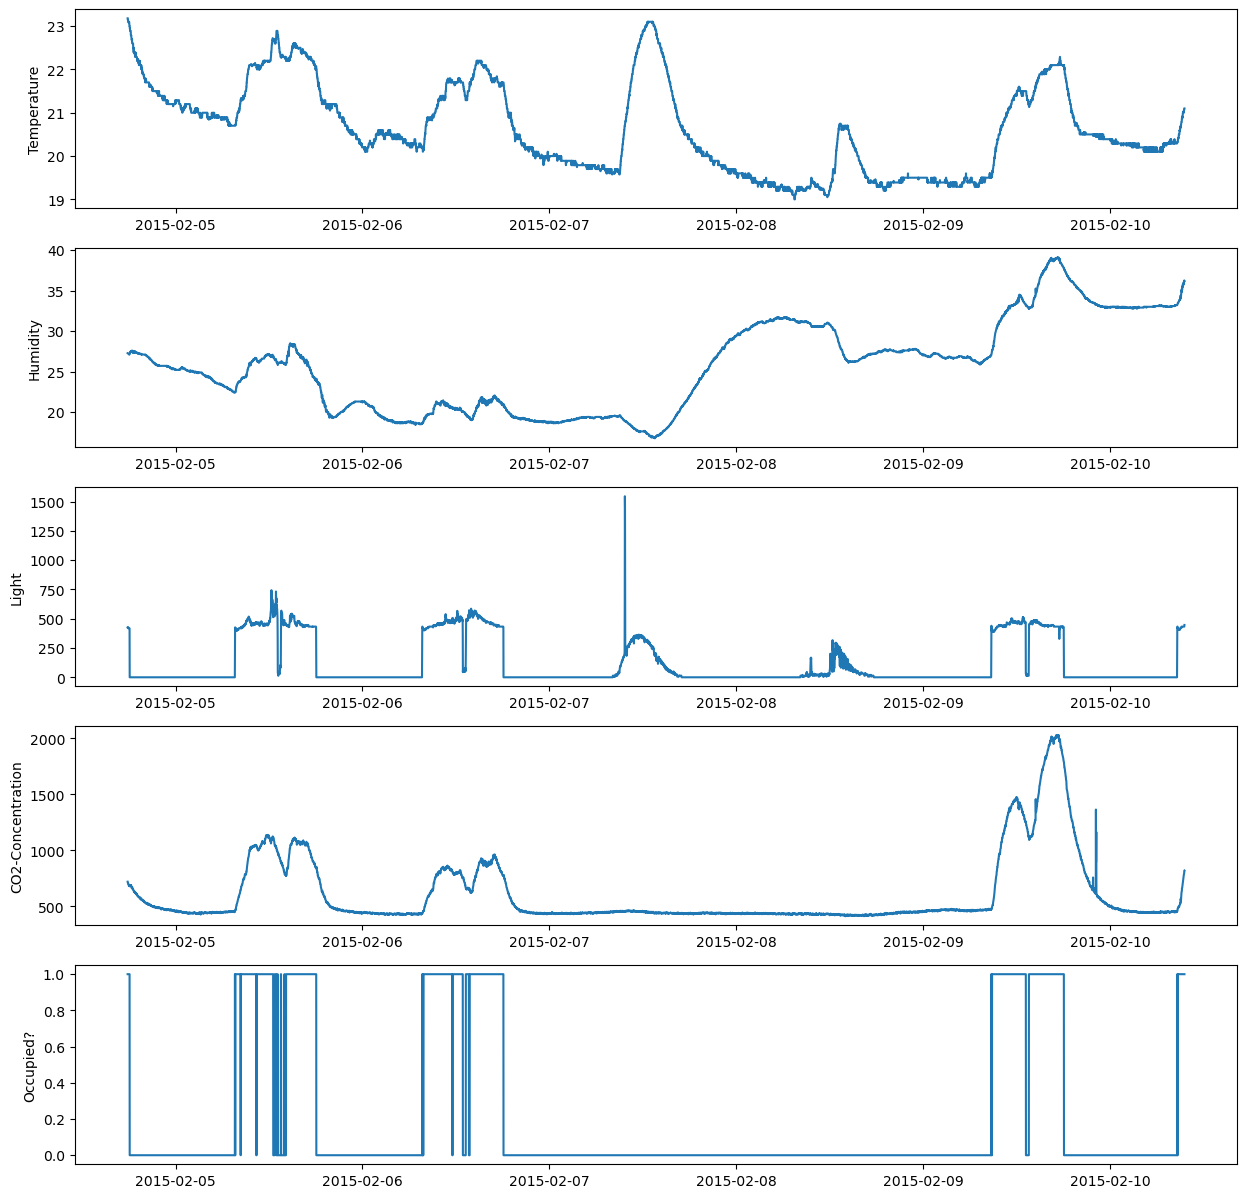

In [3]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,15))
ax1.plot(occ['Temperature'])
ax1.set_ylabel("Temperature")
ax2.plot(occ['Humidity'])
ax2.set_ylabel("Humidity")
ax3.plot(occ['Light'])
ax3.set_ylabel("Light")
ax4.plot(occ['CO2'])
ax4.set_ylabel("CO2-Concentration")
ax5.plot(occ['Occupancy'])
ax5.set_ylabel("Occupied?")

### Preparation

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


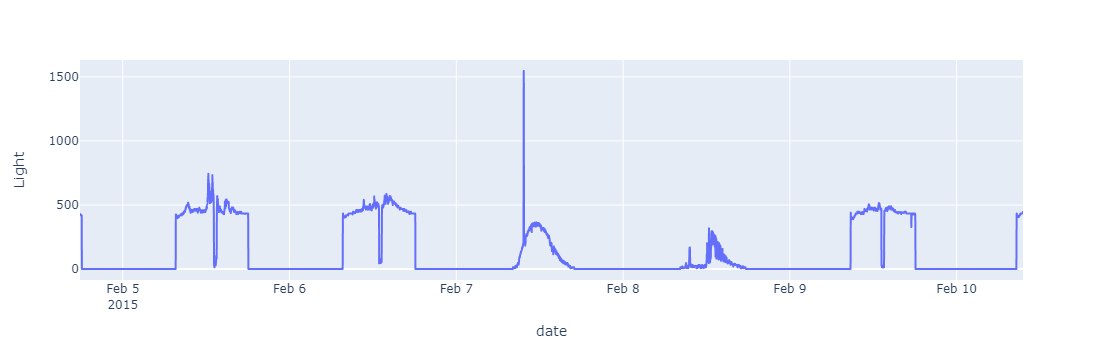

In [4]:
fig = px.line(occ, x=occ.index, y=occ['Light'])
fig.show()

In [5]:
occ.loc[(occ.index.normalize() == pd.to_datetime('2015-02-07')) & (occ['Light'] > 400), 'Light'] = np.nan

In [6]:
#occ['Light'].fillna(method='ffill', inplace=True)
occ['Light'].interpolate(method='linear', inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



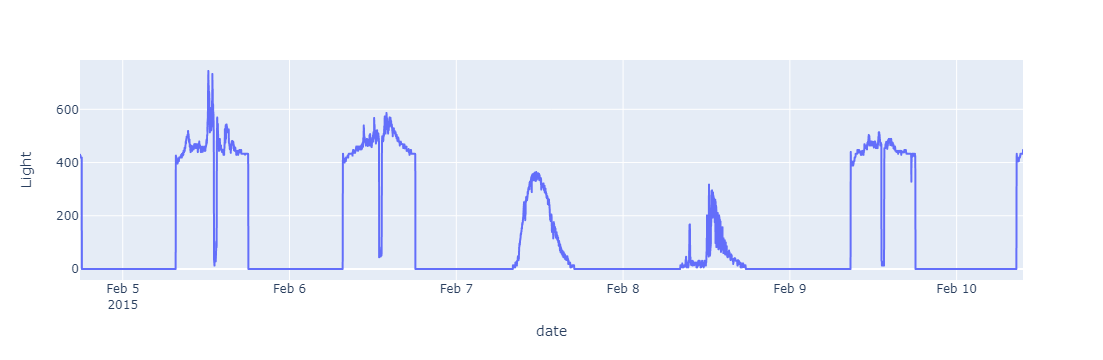

In [7]:
fig = px.line(occ, x=occ.index, y=occ['Light'])
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



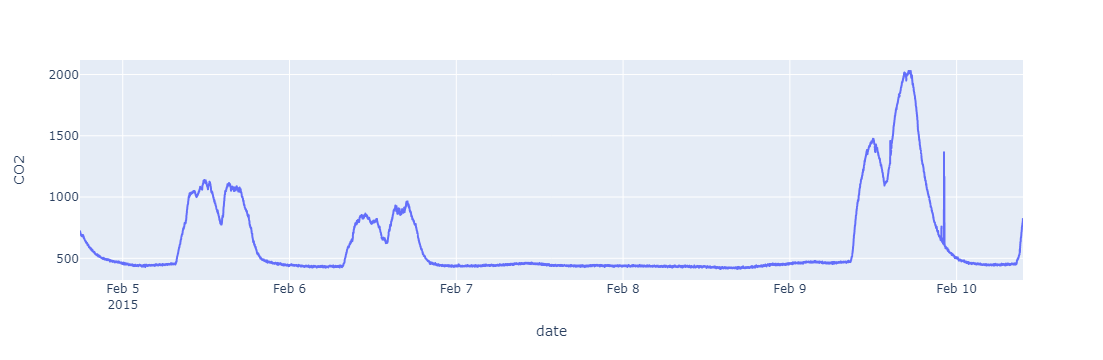

In [8]:
fig = px.line(occ, x=occ.index, y=occ['CO2'])
fig.show()

In [9]:
occ.loc[(occ.index >= '2015-02-09 22:00') & (occ.index <= '2015-02-09 22:30') & (occ['CO2'] > 800), 'CO2'] = np.nan

In [10]:
occ['CO2'].interpolate(method='linear', inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



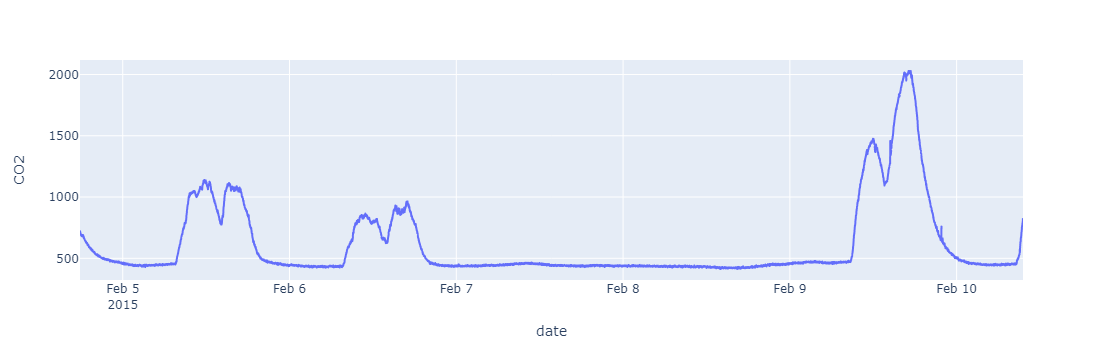

In [11]:
fig = px.line(occ, x=occ.index, y=occ['CO2'])
fig.show()

### Dealing with Time Index Information

In [12]:
occ["Hour"] = occ.index.hour
occ["Weekday"] = occ.index.weekday

occ.head()

Temperature  Humidity  Light     CO2  HumidityRatio  \
date                                                                       
2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

                     Occupancy  Hour  Weekday  
date                                           
2015-02-04 17:51:00          1    17        2  
2015-02-04 17:51:59          1    17        2  
2015-02-04 17:53:00          1    17        2  
2015-02-04 17:54:00          1    17        2  
2015-02-04 17:55:00          1    17        2

In [18]:
occ['Workinghours'] = np.where((occ['Hour'] < 20) & (occ['Hour'] > 7) & (occ['Weekday'] < 5), 1, 0)

occ.head()

Temperature  Humidity  Light     CO2  HumidityRatio  \
date                                                                       
2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

                     Occupancy  Hour  Weekday  Workinghours  
date                                                         
2015-02-04 17:51:00          1    17        2             1  
2015-02-04 17:51:59          1    17        2             1  
2015-02-04 17:53:00          1    17        2             1  
2015-02-04 17:54:00          1    17        2             1  
2015-02-04 17:55:00          1    17        2             1

In [19]:
occ = occ.drop(['HumidityRatio','Hour','Weekday'], axis = 1)
occ = occ.reindex(columns=['Temperature','Humidity','Light','CO2','Workinghours','Occupancy'])

occ.head()
#occ.info()
#occ.describe()

Temperature  Humidity  Light     CO2  Workinghours  \
date                                                                      
2015-02-04 17:51:00        23.18   27.2720  426.0  721.25             1   
2015-02-04 17:51:59        23.15   27.2675  429.5  714.00             1   
2015-02-04 17:53:00        23.15   27.2450  426.0  713.50             1   
2015-02-04 17:54:00        23.15   27.2000  426.0  708.25             1   
2015-02-04 17:55:00        23.10   27.2000  426.0  704.50             1   

                     Occupancy  
date                            
2015-02-04 17:51:00          1  
2015-02-04 17:51:59          1  
2015-02-04 17:53:00          1  
2015-02-04 17:54:00          1  
2015-02-04 17:55:00          1

<h3> Train and Test Data (70%:30%, random*) </h3>

In [20]:
labels = np.array(occ['Occupancy'])
features = occ.drop(['Occupancy'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)
X_test.shape

(2443, 5)

<h3> Train model with training data </h3>

In [21]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

<h3> How important is each feature? </h3>

In [22]:
feature_imp = pd.DataFrame(clf.feature_importances_,index=feature_list)
feature_imp

0
Temperature   0.062537
Humidity      0.018491
Light         0.566138
CO2           0.179287
Workinghours  0.173546

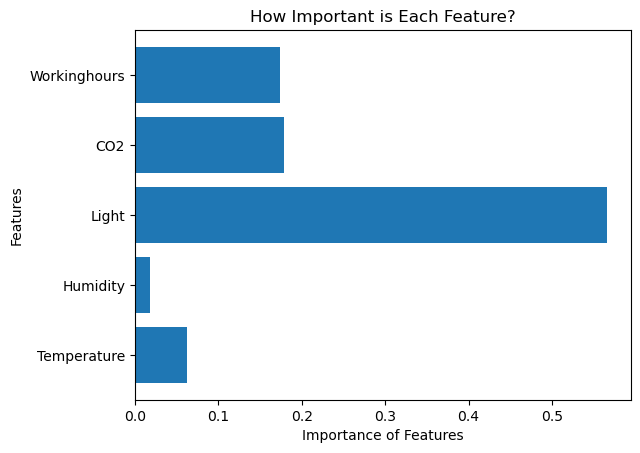

In [23]:
plt.barh(feature_imp.index,feature_imp[0])
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title("How Important is Each Feature?")
plt.show()

<h3> How well did we classify? </h3>

In [24]:
y_pred=clf.predict(X_test)
print("Unser Random-Forest-Klassifizierer klassifiziert korrekt:",metrics.accuracy_score(y_test, y_pred).round(4))

Unser Random-Forest-Klassifizierer klassifiziert korrekt: 0.9963


<h3> Example Tree </h3>

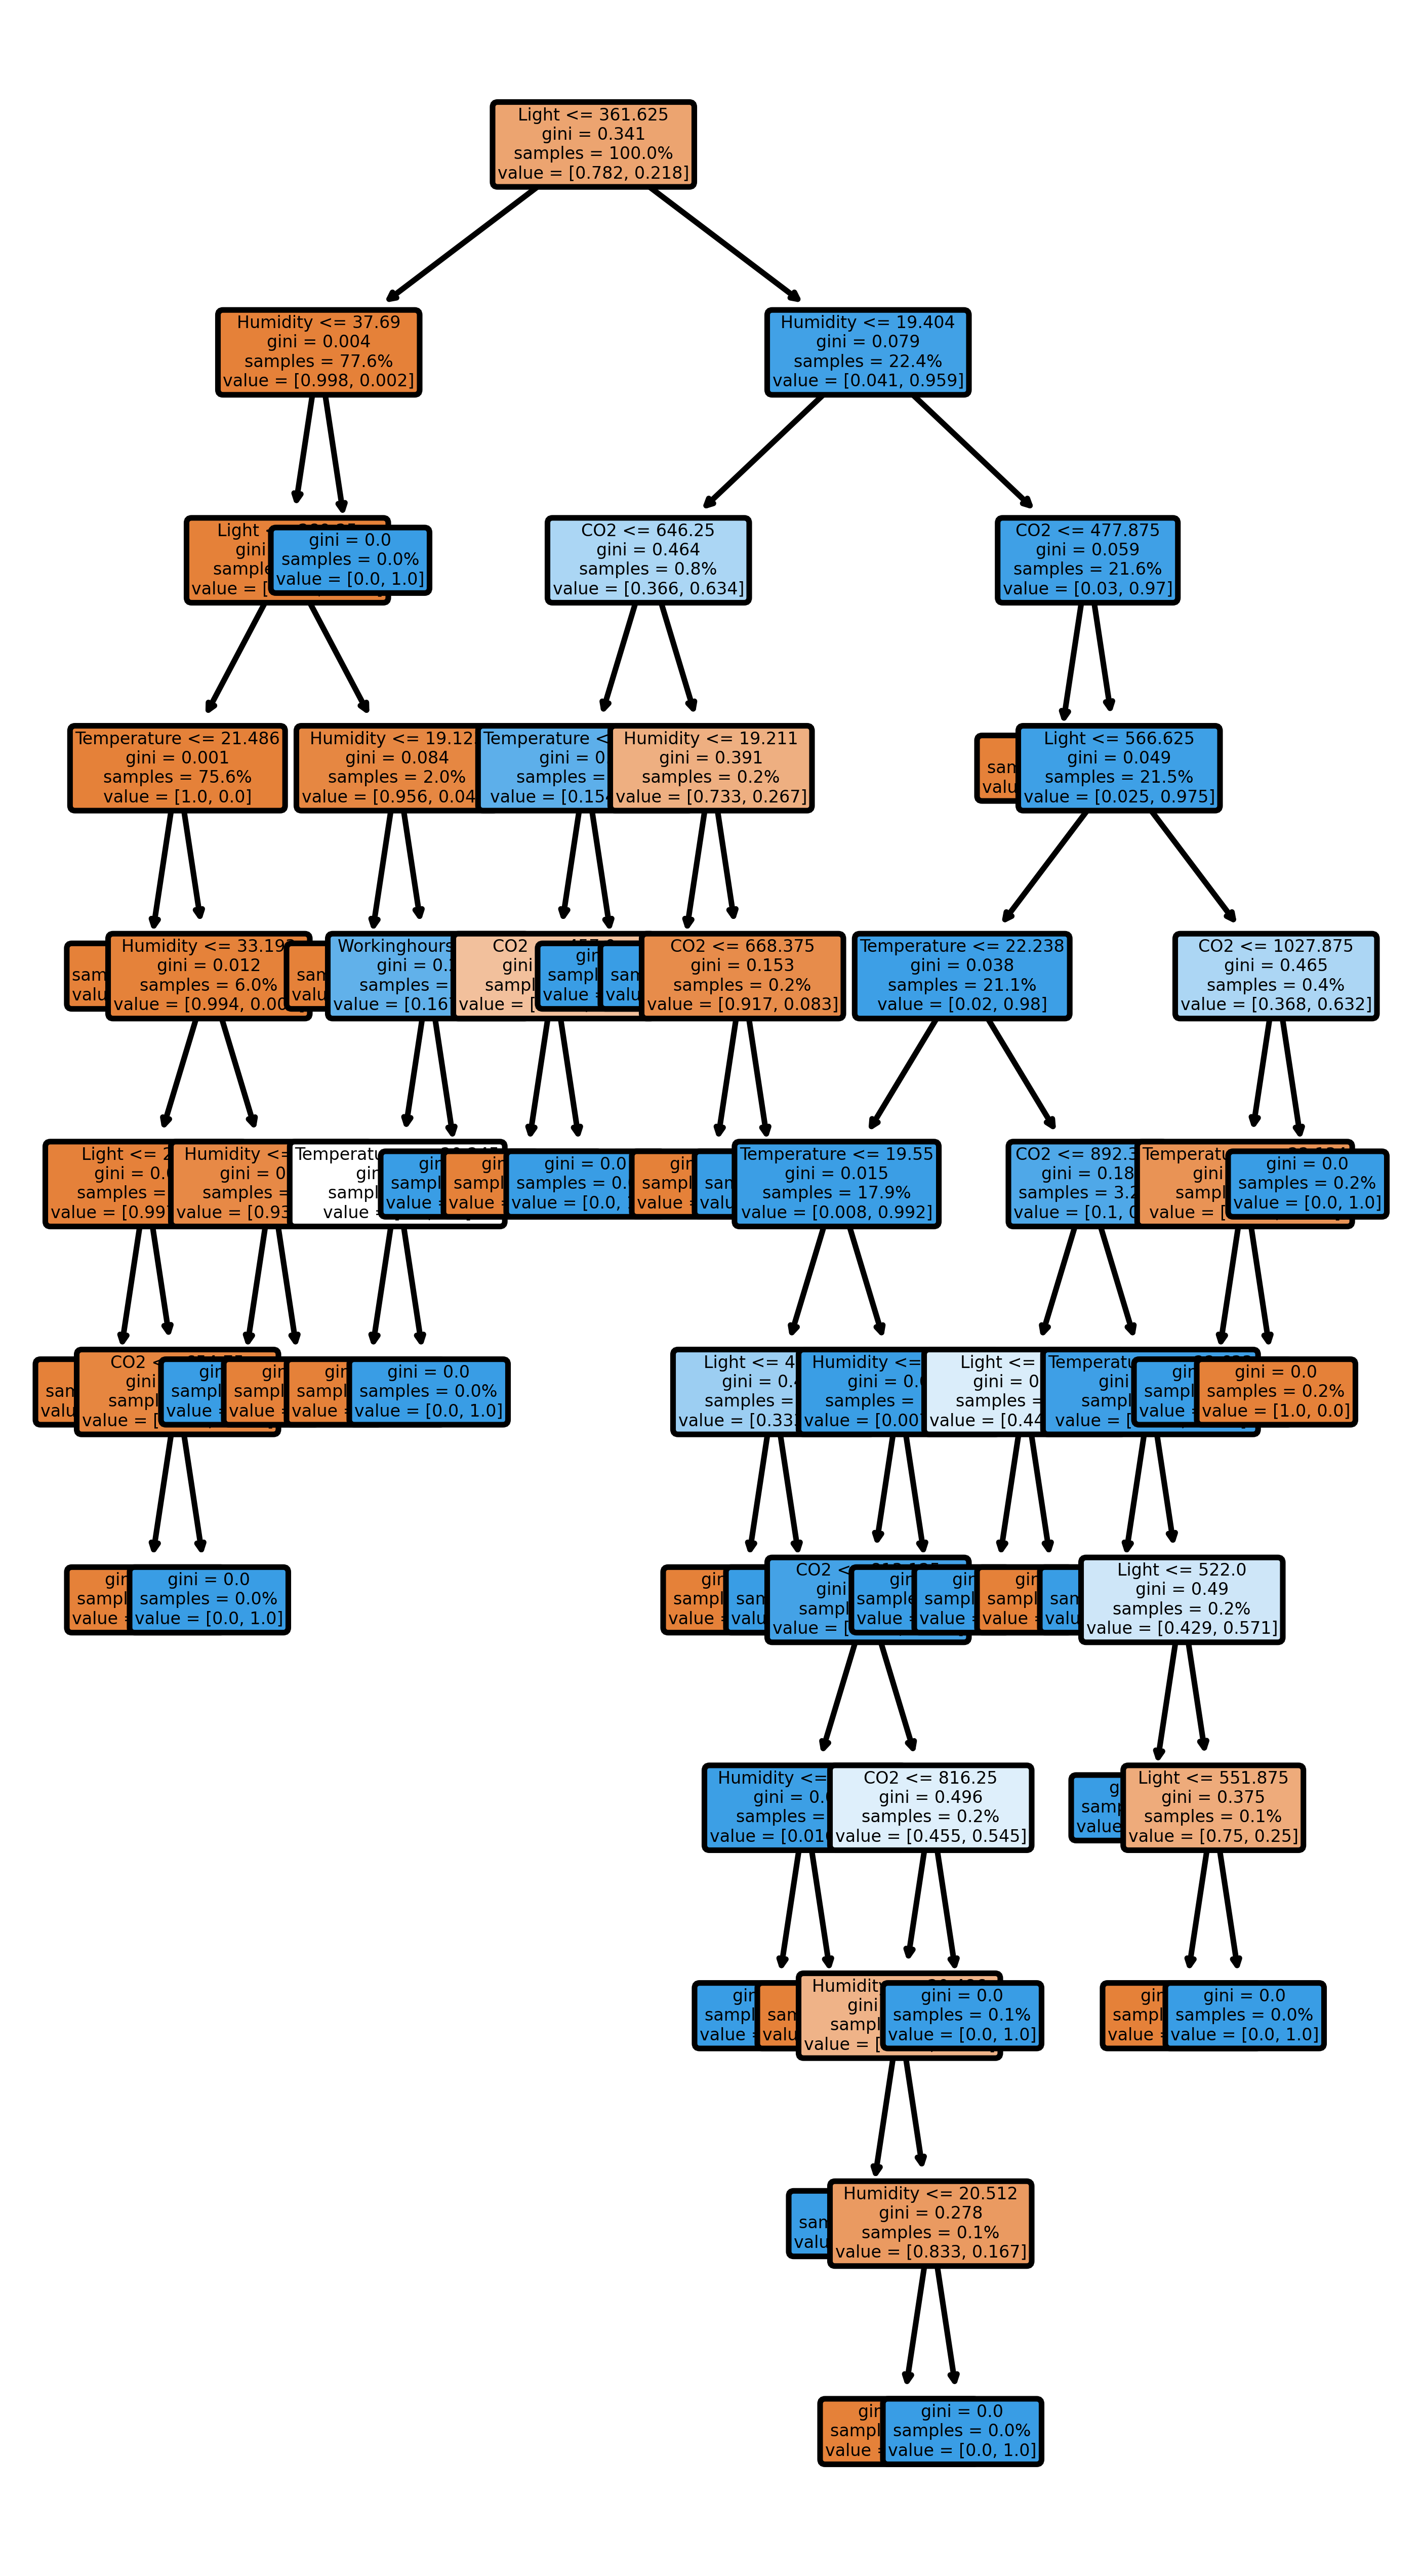

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,8), dpi=800)
tree.plot_tree(clf.estimators_[2], feature_names = feature_list, filled = True, proportion = True, rounded = True, fontsize=3);
fig.savefig('rf_einbaum.png')

<div class="alert alert-info">
Please convert this notebook into a short tutorial by...<br>
- ...adding a comment for each line of code<br>
- ...inserting / changing headings and adding markdown cells for understanding
</div>